In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv(r"C:\Users\LENOVO\Downloads\5_Pandas\Plotting\Plotting File Class Wise\Remote_Pandas_Clean_File.csv")

In [4]:
df

,Unnamed: 0,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,...,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,...,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,...,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,...,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America
3,3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,...,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe
4,4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,...,High,Depression,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,...,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,...,Low,Depression,Yes,Decrease,1,Satisfied,1,Weekly,Average,Africa
4997,4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,...,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,...,Low,Burnout,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


# 1. Descriptive Analysis of Stress Levels
Perform a descriptive analysis (mean, median, mode) of the stress levels of employees

In [10]:
# Convert Stress Levels to Numerical Values
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Numerical'] = df['Stress_Level'].map(stress_mapping)

# Calculate Descriptive Statistics
mean = df['Stress_Numerical'].mean()
median = df['Stress_Numerical'].median()
mode = df["Stress_Numerical"].mode()[0]
frequency=df["Stress_Numerical"].value_counts()


In [11]:
print(mean)

2.0082


In [12]:
print(median) #Median provides the central stress level after ranking.

2.0


In [13]:
print(mode) #Mode gives the most frequent stress level.

3


In [14]:
print(frequency) #Frequency Distribution gives you a count of employees in each category.

Stress_Numerical
3    1686
2    1669
1    1645
Name: count, dtype: int64


**df.map()**:for value replacing
    
df.map() is a method used in pandas to map values from a Series or DataFrame based on a provided dictionary or function.    
    
    
df['Stress_Level'].map(stress_mapping) applies the stress_mapping dictionary to the Stress_Level column.

It converts "Low" to 1, "Medium" to 2, and "High" to 3.    

# 2. Age Group Distribution Analysis
Analyze the distribution of age groups in the dataset.

In [19]:
def age_group(Age):
    
    if Age>18 and Age<=30:
        return "18-30"
    elif Age>30 and Age<=40:
        return "30-40"
    elif Age>40 and Age<=50:
        return "40-50"
    elif Age>50 and Age<=60:
        return "50-60"
    else :
        return "60+"
        
   



In [20]:
df["Age Group"]=df["Age"].apply(age_group)


In [21]:
df["Age Group"].value_counts()

Age Group
40-50    1321
50-60    1270
30-40    1239
18-30    1170
Name: count, dtype: int64

In [23]:
age_group_distribution = df['Age Group'].value_counts().sort_index()

In [24]:
age_group_distribution

Age Group
18-30    1170
30-40    1239
40-50    1321
50-60    1270
Name: count, dtype: int64

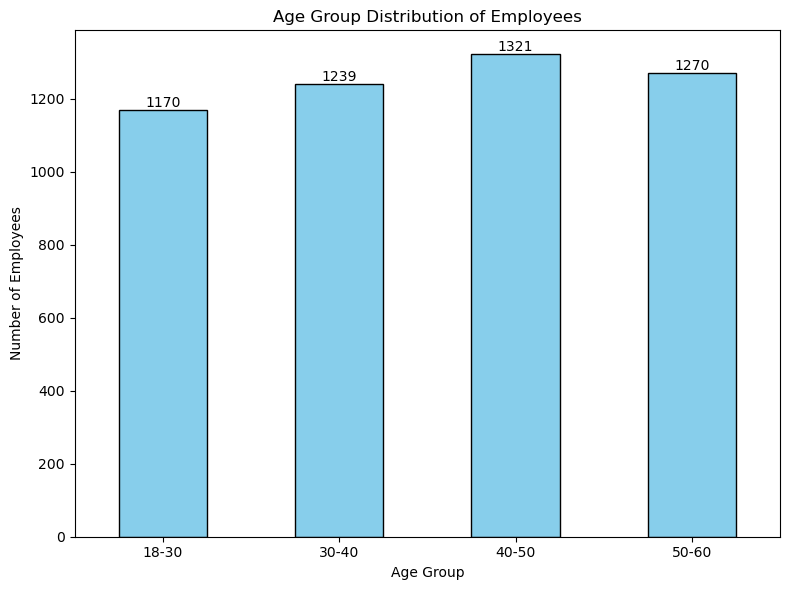

In [102]:
# Plot the distribution
plt.figure(figsize=(8, 6))
ax=age_group_distribution.plot(kind='bar', color='skyblue',edgecolor="black")
plt.title('Age Group Distribution of Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

# Show the plot
plt.show()

The plt.tight_layout() function in Matplotlib is used to automatically adjust the subplot parameters so that the subplot(s)
fit into the figure area cleanly. This is particularly useful when your labels, titles,or 
ticks might overlap with each other or with the figure borders.

You can call plt.tight_layout() before displaying your plot with plt.show().

plt.tight_layout() ensures that the title, x-axis label, and y-axis label do not overlap, making the plot look neat.

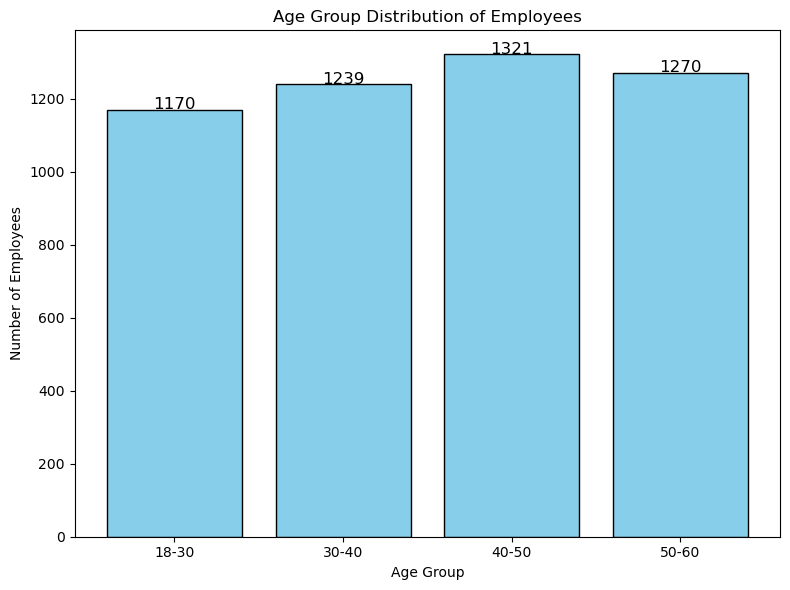

In [101]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=0)
plt.bar(age_group_distribution.index.values,age_group_distribution.values,color='skyblue',edgecolor="black")
plt.title('Age Group Distribution of Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')


for i, value in enumerate(age_group_distribution.values):
    plt.text(i, value + 2, f'{value:0}',ha='center', fontsize=12, color='k')
    
    
plt.tight_layout()
plt.show()

# 3. Gender Distribution Analysis
Analyze the gender distribution across different industries and job roles.

In [47]:
gender_distribution = df.groupby(['Industry', 'Job_Role', 'Gender']).size().unstack(fill_value=0)

In [74]:
gender_distribution

Gender                           Female  Male  Non-binary  Prefer not to say
Industry      Job_Role                                                      
Consulting    Data Scientist         32    18          19                 23
              Designer               25    21          22                 24
              HR                     27    24          25                 33
              Marketing              21    27          24                 26
              Project Manager        20    23          22                 27
              Sales                  33    28          25                 14
              Software Engineer      23    36          20                 18
Education     Data Scientist         28    24          21                 25
              Designer               24    29          24                 23
              HR                     26    22          24                 27
              Marketing              20    23          14                 15
              Project Manager        29    38          29                 30
              Sales                  25    23          19                 19
              Software Engineer      25    29          28                 27
Finance       Data Scientist         37    24          16                 27
              Designer               28    26          29                 29
              HR                     30    33          25                 30
              Marketing              27    26          18                 31
              Project Manager        31    27          17                 32
              Sales                  25    27          30                 23
              Software Engineer      26    24          27                 22
Healthcare    Data Scientist         22    24          27                 31
              Designer               29    23          37                 33
              HR                     21    17          23                 16
              Marketing              25    29          26                 17
              Project Manager        17    31          31                 26
              Sales                  38    25          26                 35
              Software Engineer      25    29          27                 18
IT            Data Scientist         25    23          24                 28
              Designer               23    21          23                 17
              HR                     23    37          22                 34
              Marketing              35    32          19                 24
              Project Manager        24    37          24                 28
              Sales                  28    24          38                 35
              Software Engineer      22    24          23                 29
Manufacturing Data Scientist         28    20          23                 17
              Designer               21    21          33                 26
              HR                     26    22          20                 35
              Marketing              21    25          31                 21
              Project Manager        29    18          27                 22
              Sales                  21    29          30                 23
              Software Engineer      30    15          27                 22
Retail        Data Scientist         32    28          26                 24
              Designer               32    30          24                 26
              HR                     26    24          17                 27
              Marketing              22    30          30                 24
              Project Manager        20    26          29                 24
              Sales                  23    26          17                 24
              Software Engineer      24    28          32                 31

<Figure size 6000x3000 with 0 Axes>

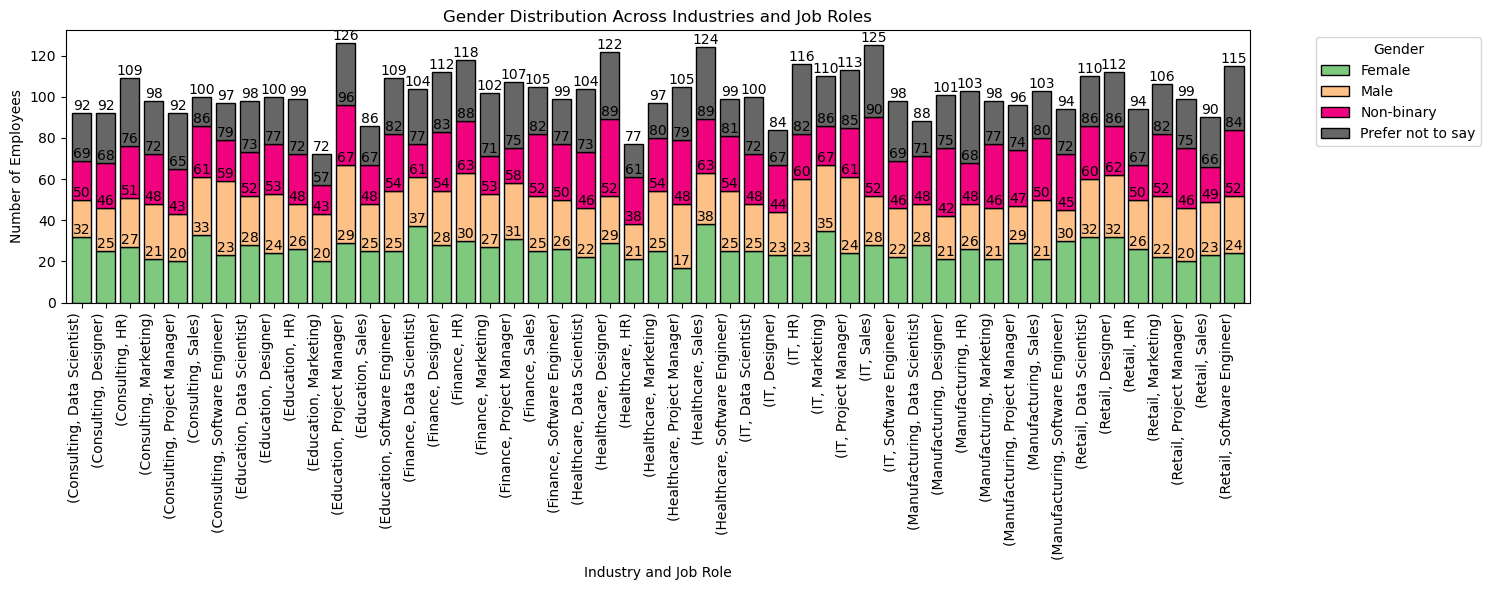

In [99]:
plt.figure(figsize=(60,30))
ax=gender_distribution.plot(kind='bar',colormap="Accent",stacked=True,figsize=(15, 6),width=0.8,edgecolor="black")
plt.title('Gender Distribution Across Industries and Job Roles')
plt.xlabel('Industry and Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()


for i in ax.containers:
    ax.bar_label(i)


plt.show()

The size() method combined with unstack() in pandas is a powerful way to reshape data, 
especially when you want to analyze categorical data across multiple dimensions. 


.size():This method is called on a grouped DataFrame or Series and returns the size of each group. Essentially, 
    it counts the number of occurrences in each group defined by the groupby() operation.
    
.unstack(fill_value=0):    It pivots the inner index (the second level of the index in a multi-index DataFrame) into columns, 
    creating a DataFrame where each unique value from that level becomes a column.
    The fill_value=0 parameter specifies that any missing values resulting from the unstacking process should be filled with 0.

# 4. Work Location Distribution
Identify the distribution of work locations (remote, hybrid, onsite) across different job roles.

In [75]:
work_location_distribution = df.groupby(['Job_Role', 'Work_Location']).size().unstack(fill_value=0)

In [76]:
work_location_distribution

Work_Location,Hybrid,Onsite,Remote
Job_Role,,,
Data Scientist,226,216,254
Designer,251,229,243
HR,233,228,255
Marketing,225,230,228
Project Manager,244,252,242
Sales,243,245,245
Software Engineer,227,237,247


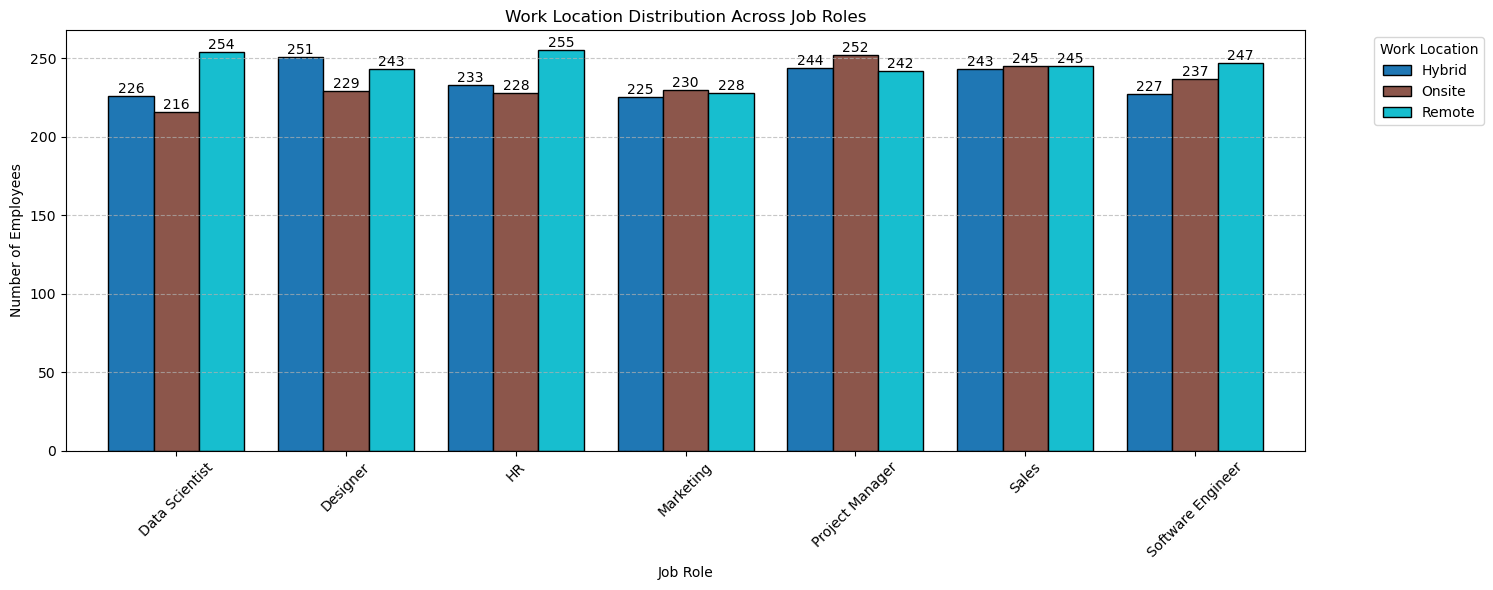

In [97]:
ax = work_location_distribution.plot(kind='bar', figsize=(15, 6), width=0.8, colormap='tab10',edgecolor='black')

# Customizing the plot
plt.title('Work Location Distribution Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Work Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i in ax.containers:
    ax.bar_label(i)


# Show the plot
plt.show()

# 5. Stress Levels and Work Location
Compare the stress levels of employees based on their work location (remote, hybrid, onsite).

stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Numerical'] = df['Stress_Level'].map(stress_mapping)

In [89]:
average_stress = df.groupby('Work_Location')['Stress_Numerical'].mean()

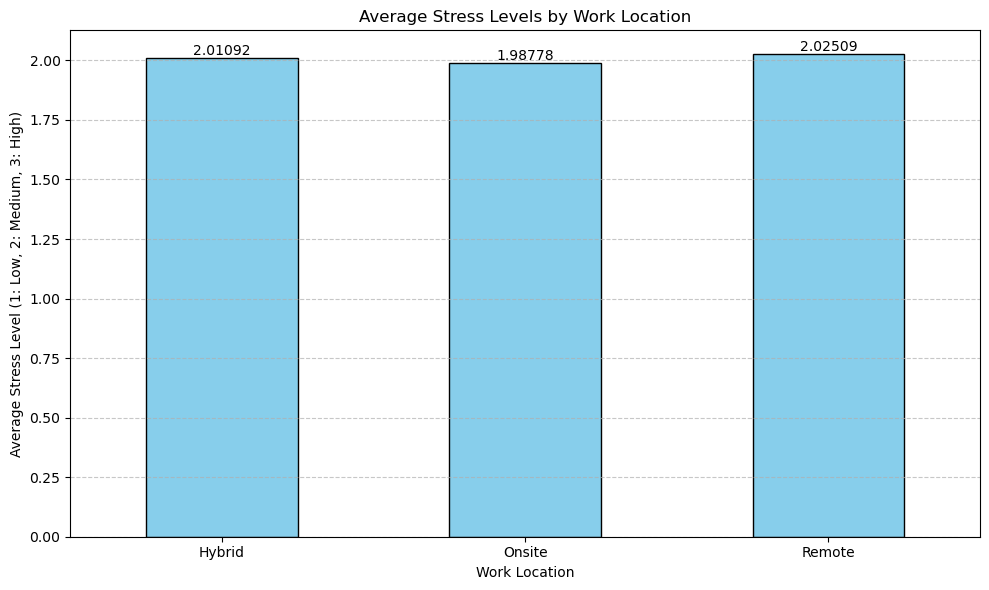

In [104]:
plt.figure(figsize=(10, 6))
ax=average_stress.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Stress Levels by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Average Stress Level (1: Low, 2: Medium, 3: High)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i in ax.containers:
    ax.bar_label(i)




# Show the plot
plt.tight_layout()
plt.show()

# 6. Mental Health Conditions by Age
Analyze how mental health conditions vary across different age groups.

In [107]:
mental_health_distribution = df.groupby(['Age Group', 'Mental_Health_Condition']).size().unstack(fill_value=0)

In [108]:
mental_health_distribution

Mental_Health_Condition,Anxiety,Burnout,Depression
Age Group,,,
18-30,394,407,369
30-40,397,401,441
40-50,460,450,411
50-60,404,441,425


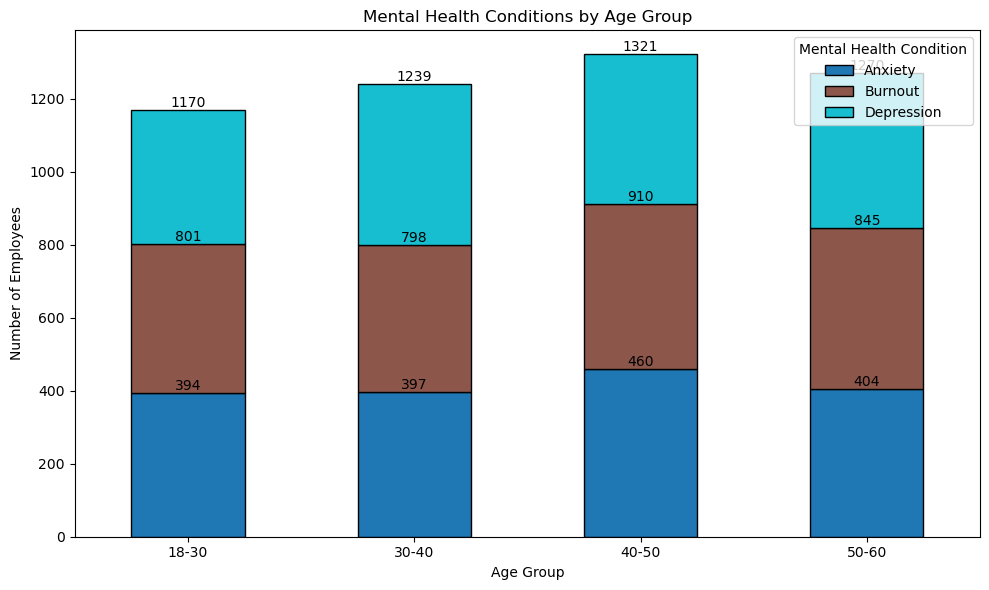

In [110]:
ax=mental_health_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10',edgecolor="black")

# Customizing the plot
plt.title('Mental Health Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Mental Health Condition')
plt.tight_layout()



for i in ax.containers:
    ax.bar_label(i)

# Show the plot
plt.show()

# 7. Stress Levels by Gender
Compare the stress levels between different genders

In [114]:
average_stress_gender = df.groupby('Gender')['Stress_Numerical'].mean()

In [115]:
average_stress_gender

Gender
Female               2.019623
Male                 1.974803
Non-binary           2.009061
Prefer not to say    2.029791
Name: Stress_Numerical, dtype: float64

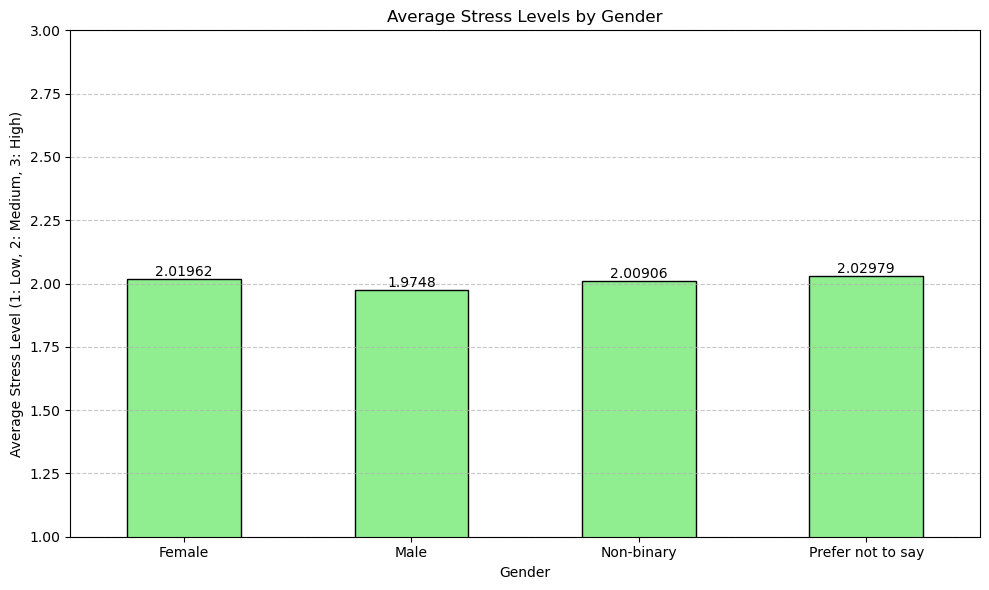

In [132]:
# Plotting the average stress levels by gender
plt.figure(figsize=(10, 6))
ax=average_stress_gender.plot(kind='bar', color='lightgreen', edgecolor='black')

# Customizing the plot
plt.title('Average Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Stress Level (1: Low, 2: Medium, 3: High)')
plt.xticks(rotation=0)
plt.ylim(1, 3)  # Set limits to match stress level mapping
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i in ax.containers:
    ax.bar_label(i)


# Show the plot
plt.tight_layout()
plt.show()

In [122]:
# Group by Job Role and calculate the mean stress level
average_stress_job_role = df.groupby('Job_Role')['Stress_Numerical'].mean()
average_stress_job_role

Job_Role
Data Scientist       2.017241
Designer             1.990318
HR                   1.980447
Marketing            2.005857
Project Manager      2.033875
Sales                2.016371
Software Engineer    2.012658
Name: Stress_Numerical, dtype: float64

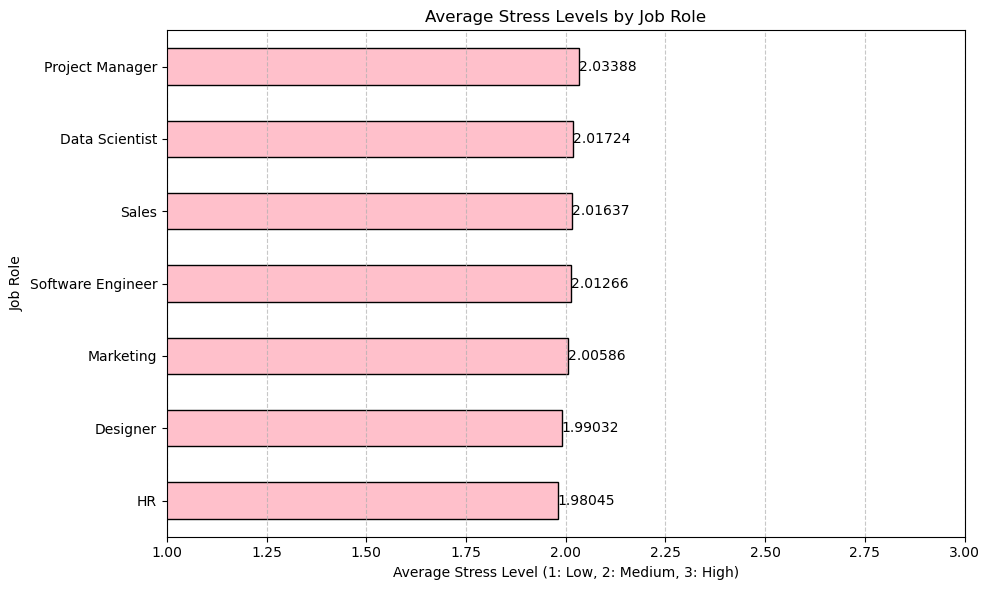

In [129]:
# Sort the values for better visualization
average_stress_job_role = average_stress_job_role.sort_values()

# Plotting the average stress levels by job role
plt.figure(figsize=(10, 6))
ax=average_stress_job_role.plot(kind='barh', color='pink', edgecolor='black')

# Customizing the plot
plt.title('Average Stress Levels by Job Role')
plt.xlabel('Average Stress Level (1: Low, 2: Medium, 3: High)')
plt.ylabel('Job Role')
plt.xlim(1, 3)  # Set limits to match stress level mapping
plt.grid(axis='x', linestyle='--', alpha=0.7)


for i in ax.containers:
    ax.bar_label(i,"")




# Show the plot
plt.tight_layout()
plt.show()

# 9. Industry-wise Mental Health Conditions
Compare the prevalence of mental health conditions (e.g., anxiety, depression) across different industries.

In [133]:
# Group by Industry and Mental Health Condition, then count occurrences
mental_health_by_industry = df.groupby(['Industry', 'Mental_Health_Condition']).size().unstack(fill_value=0)

mental_health_by_industry

Mental_Health_Condition,Anxiety,Burnout,Depression
Industry,,,
Consulting,229,219,232
Education,233,232,225
Finance,238,273,236
Healthcare,220,259,249
IT,258,245,243
Manufacturing,235,232,216
Retail,242,239,245


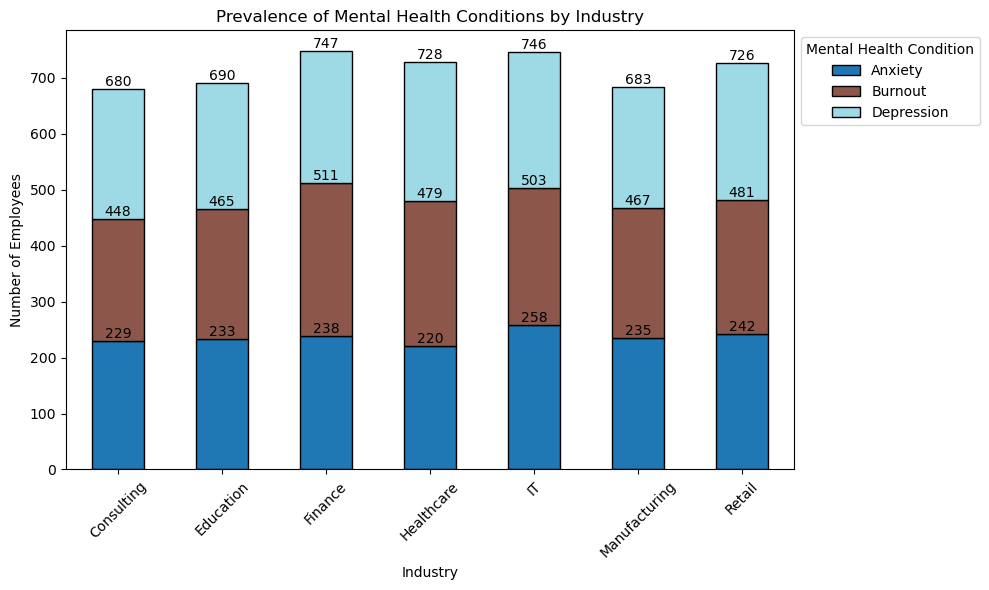

In [141]:
# Plotting the data
ax=mental_health_by_industry.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20',edgecolor="black")

# Customizing the plot
plt.title('Prevalence of Mental Health Conditions by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Condition', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()


for i in ax.containers:
    ax.bar_label(i,"")


# Show the plot
plt.show()

# 10. Social Isolation and Work Location
Analyze the relationship between social isolation ratings and work location.

In [143]:
# Group by Work Location and calculate the mean social isolation rating
avg_isolation_work_location = df.groupby('Work_Location')['Social_Isolation_Rating'].mean()
avg_isolation_work_location

Work_Location
Hybrid    3.008490
Onsite    3.012828
Remote    2.961494
Name: Social_Isolation_Rating, dtype: float64

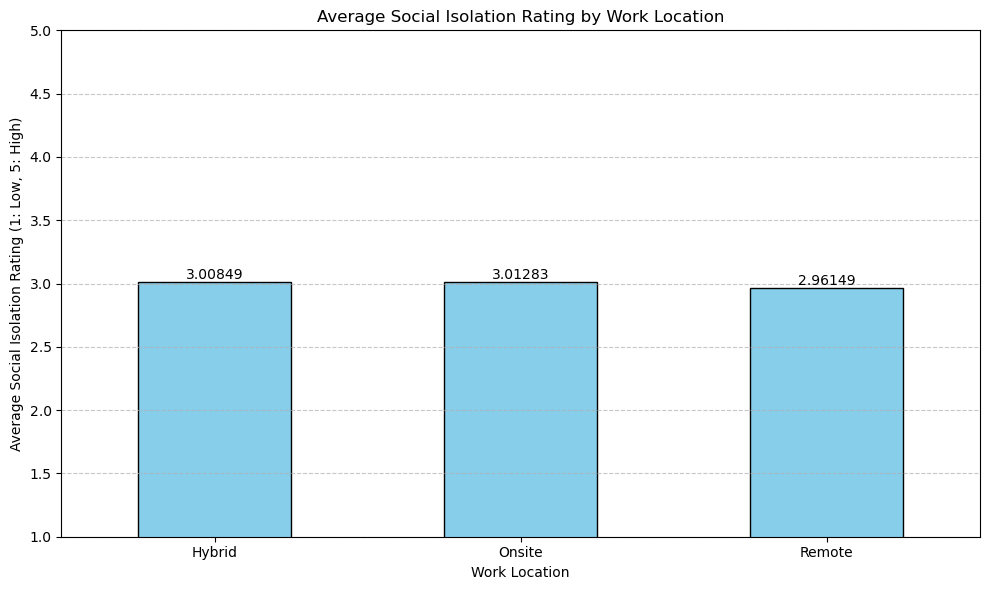

In [151]:
# Plotting the average social isolation rating by work location
plt.figure(figsize=(10, 6))
ax=avg_isolation_work_location.plot(kind='bar', color='skyblue', edgecolor='black')

# Customizing the plot
plt.title('Average Social Isolation Rating by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Average Social Isolation Rating (1: Low, 5: High)')
plt.xticks(rotation=0)
plt.ylim(1, 5)  # Rating scale is between 1 and 5
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i in ax.containers:
    ax.bar_label(i)

# Show the plot
plt.tight_layout()
plt.show()

# Correlation and Causal Analysis


# 11. Correlation Between Stress Levels and Age
Calculate the correlation between stress levels and the age of employees

In [147]:
# Calculate the correlation between Age and Stress_Numerical
correlation = df['Age'].corr(df['Stress_Numerical'])
correlation

0.015104441527444315

In [148]:
# Display the correlation
print(f"Correlation between Age and Stress Levels: {correlation:.2f}")

Correlation between Age and Stress Levels: 0.02


# 12. Correlation Between Social Isolation and Stress Levels
Examine the relationship between social isolation ratings and stress levels

In [153]:
# Calculate the correlation between Social Isolation rating and Stress level
correlation = df['Social_Isolation_Rating'].corr(df['Stress_Numerical'])
correlation

0.031499821397633174

In [154]:
# Display the correlation
print(f"Correlation between Social Isolation and Stress Levels: {correlation:.2f}")

Correlation between Social Isolation and Stress Levels: 0.03


# 13. Work Satisfaction and Mental Health Conditions
Analyze how mental health conditions affect satisfaction with remote work.

In [156]:
# Group by Mental Health Condition and Satisfaction
mental_health_satisfaction = df.groupby(['Mental_Health_Condition', 'Satisfaction_with_Remote_Work']).size().unstack(fill_value=0)

mental_health_satisfaction

Satisfaction_with_Remote_Work,Neutral,Satisfied,Unsatisfied
Mental_Health_Condition,,,
Anxiety,542,566,547
Burnout,567,550,582
Depression,539,559,548


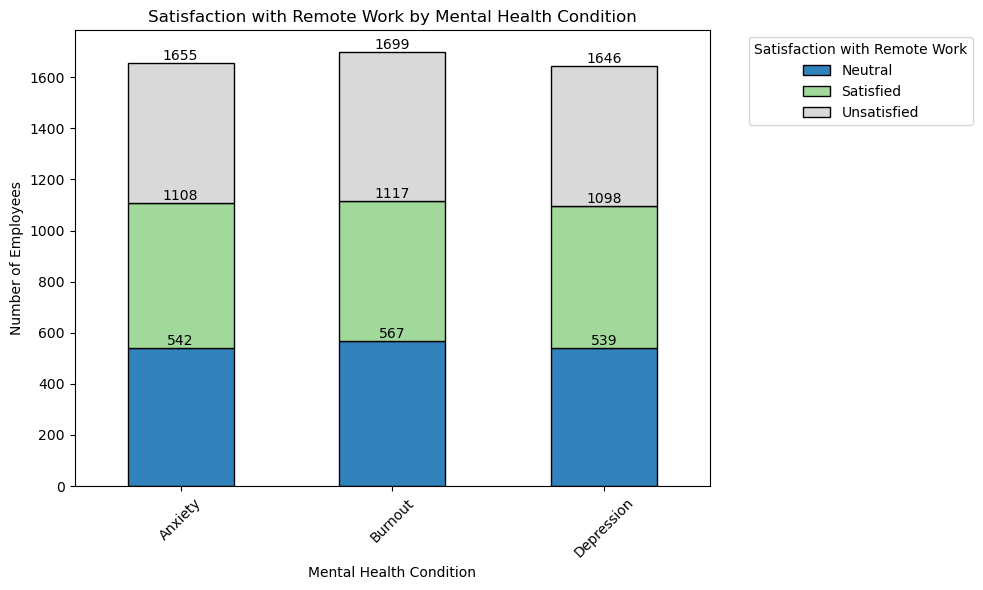

In [169]:
# Plotting the data
ax=mental_health_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c',edgecolor="black")

# Customizing the plot
plt.title('Satisfaction with Remote Work by Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction with Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()



for i in ax.containers:
    ax.bar_label(i)


# Show the plot
plt.show()

# 14. Correlation Between Work Satisfaction and Stress Levels
Identify the correlation between satisfaction with remote work and stress levels.

In [171]:
# Map satisfaction with remote work to numerical values
satisfaction_mapping = {'Unsatisfied': 1, 'Neutral': 2, 'Satisfied': 3}
df['Satisfaction_Numeric'] = df['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)



In [173]:
df.head(2)

,Unnamed: 0,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,...,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Stress_Numerical,Age Group,Satisfaction_Numeric
0,0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,...,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,2,30-40,1
1,1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,...,Increase,3,Satisfied,2,Weekly,Good,Asia,2,30-40,3


In [174]:
# Calculate the correlation between Satisfaction and Stress Levels
correlation = df['Satisfaction_Numeric'].corr(df['Stress_Numerical'])

# Display the correlation
print(f"Correlation between Satisfaction with Remote Work and Stress Levels: {correlation:.2f}")

Correlation between Satisfaction with Remote Work and Stress Levels: -0.01


# 15. Social Isolation and Mental Health
Explore the correlation between social isolation ratings and mental health conditions.

In [175]:
# Map Mental Health Conditions to numerical values
mental_health_mapping = {'No Condition': 0, 'Anxiety': 1, 'Depression': 2, 'Burnout': 3}
df['Mental_Health_Condition_Numeric'] = df['Mental_Health_Condition'].map(mental_health_mapping)



In [177]:
df.head(2)

,Unnamed: 0,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,...,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Stress_Numerical,Age Group,Satisfaction_Numeric,Mental_Health_Condition_Numeric
0,0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,...,1,Unsatisfied,1,Weekly,Good,Europe,2,30-40,1,2
1,1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,...,3,Satisfied,2,Weekly,Good,Asia,2,30-40,3,1


In [179]:
# Calculate the correlation between Social Isolation Rating and Mental Health Condition
correlation = df['Social_Isolation_Rating'].corr(df['Mental_Health_Condition_Numeric'])

correlation

-0.002754222995791621

In [180]:
# Display the correlation
print(f"Correlation between Social Isolation and Mental Health Conditions: {correlation:.2f}")

Correlation between Social Isolation and Mental Health Conditions: -0.00


# 16. Effect of Work Location on Social Isolation
Investigate how different work locations affect feelings of social isolation

In [182]:
# Group by Work Location and calculate mean social isolation rating
mean_isolation = df.groupby('Work_Location')['Social_Isolation_Rating'].mean()
mean_isolation

Work_Location
Hybrid    3.008490
Onsite    3.012828
Remote    2.961494
Name: Social_Isolation_Rating, dtype: float64

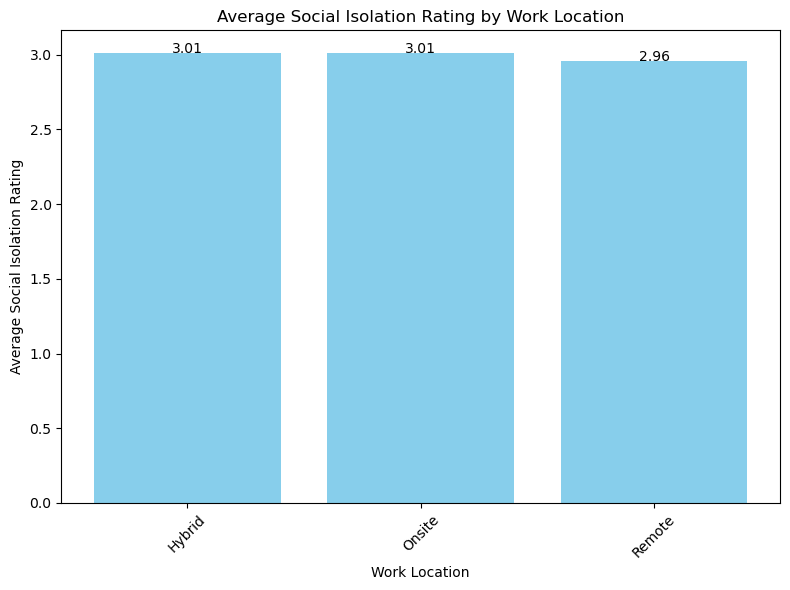

In [192]:

# Plot the relationship using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_isolation.index.values, mean_isolation.values,color="skyblue")

# Customizing the plot
plt.title('Average Social Isolation Rating by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Average Social Isolation Rating')
plt.xticks(rotation=45)
plt.tight_layout()


for i, value in enumerate(mean_isolation.values):
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Show the plot
plt.show()

In [187]:
import seaborn as sns

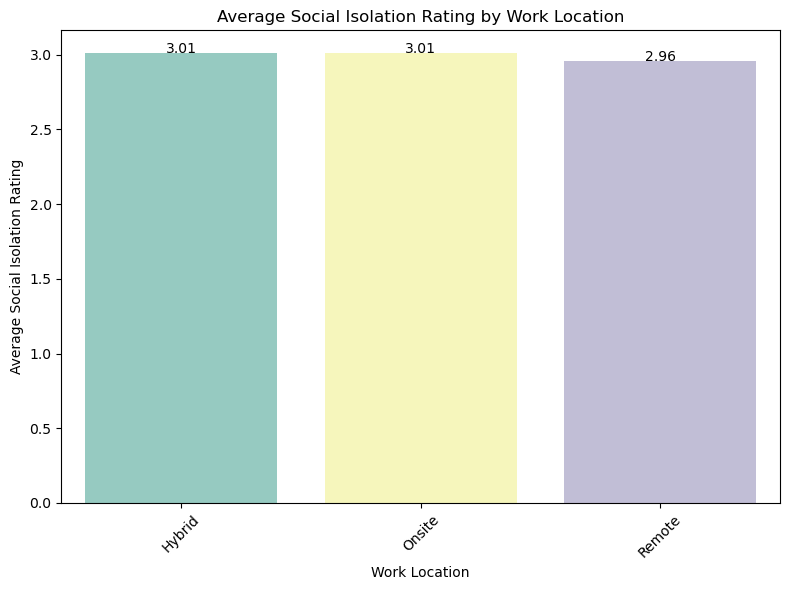

In [193]:
# Plot the relationship using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_isolation.index, y=mean_isolation.values, palette='Set3')

# Customizing the plot
plt.title('Average Social Isolation Rating by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Average Social Isolation Rating')
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(mean_isolation.values):
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=10, color='black')


# Show the plot
plt.show()

# 17. Stress Levels and Job Satisfaction
Explore whether employees with higher stress levels report lower satisfaction with remote work.

In [194]:
# Group by Stress Levels and calculate mean satisfaction
mean_satisfaction_by_stress = df.groupby('Stress_Numerical')['Satisfaction_Numeric'].mean()
mean_satisfaction_by_stress

Stress_Numerical
1    2.006687
2    2.008388
3    1.983986
Name: Satisfaction_Numeric, dtype: float64

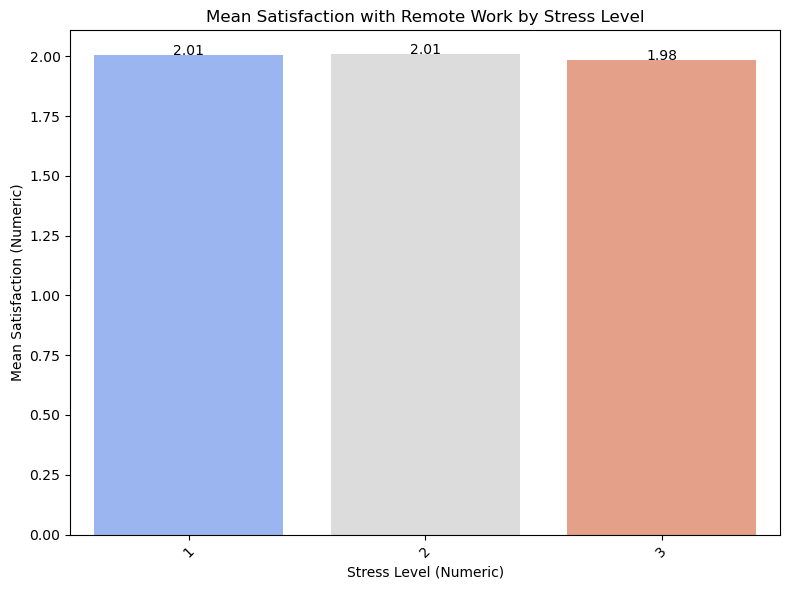

In [197]:
# Plot the relationship using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_satisfaction_by_stress.index, y=mean_satisfaction_by_stress.values, palette='coolwarm')

# Customizing the plot
plt.title('Mean Satisfaction with Remote Work by Stress Level')
plt.xlabel('Stress Level (Numeric)')
plt.ylabel('Mean Satisfaction (Numeric)')
plt.xticks(rotation=45)
plt.tight_layout()


for i, value in enumerate(mean_satisfaction_by_stress.values):
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Show the plot
plt.show()

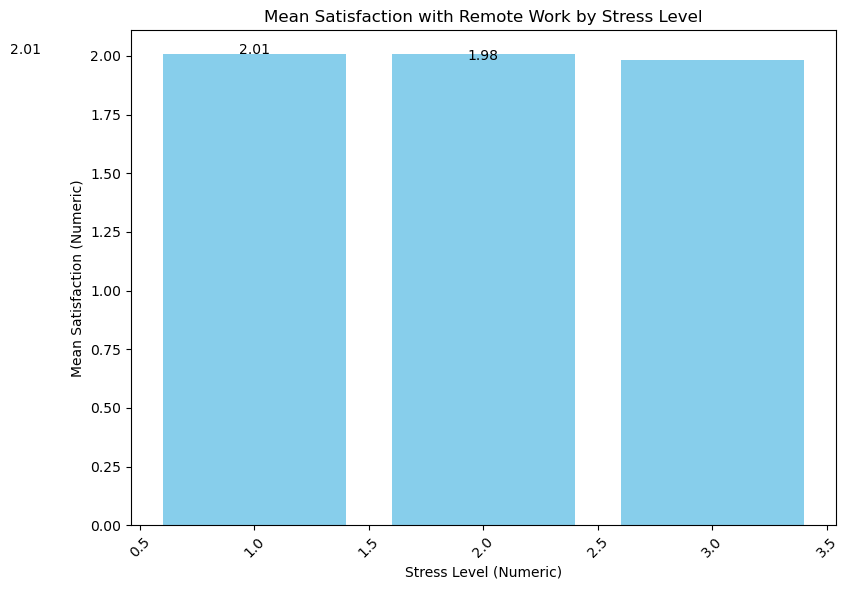

In [204]:
# Plot the relationship using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_satisfaction_by_stress.index, mean_satisfaction_by_stress.values,color="skyblue")

# Customizing the plot
plt.title('Mean Satisfaction with Remote Work by Stress Level')
plt.xlabel('Stress Level (Numeric)')
plt.ylabel('Mean Satisfaction (Numeric)')
plt.xticks(rotation=45)
plt.tight_layout()


for i, value in enumerate(mean_satisfaction_by_stress.values):
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=10, color='k')

# Show the plot
plt.show()

# 18. Impact of Gender on Mental Health
Analyze how gender affects mental health conditions (e.g., anxiety, depression

In [205]:
# Group by Gender and Mental Health Condition to count occurrences
mental_health_by_gender = df.groupby(['Gender', 'Mental_Health_Condition']).size().unstack(fill_value=0)
mental_health_by_gender

Mental_Health_Condition,Anxiety,Burnout,Depression
Gender,,,
Female,396,439,439
Male,422,427,421
Non-binary,401,411,402
Prefer not to say,436,422,384


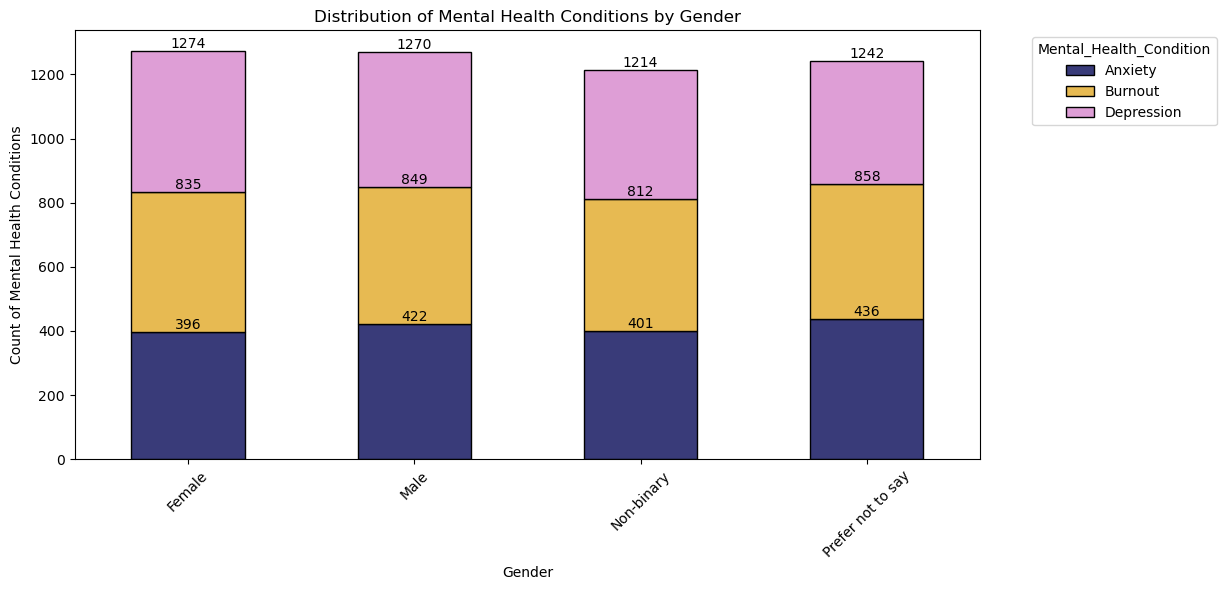

In [210]:
# Plot the data using a stacked bar plot
ax=mental_health_by_gender.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(10, 6),edgecolor="black")

# Customizing the plot
plt.title('Distribution of Mental Health Conditions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Mental Health Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Mental_Health_Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


for i in ax.containers:
    ax.bar_label(i)


# Show the plot
plt.show()

# 19. Industry and Stress Levels
Investigate the relationship between industry and self-reported stress levels.

In [211]:
# Group by Industry and Stress Level to count occurrences
stress_by_industry = df.groupby(['Industry', 'Stress_Level']).size().unstack(fill_value=0)
stress_by_industry

Stress_Level,High,Low,Medium
Industry,,,
Consulting,219,226,235
Education,238,205,247
Finance,266,248,233
Healthcare,257,231,240
IT,243,263,240
Manufacturing,215,229,239
Retail,248,243,235


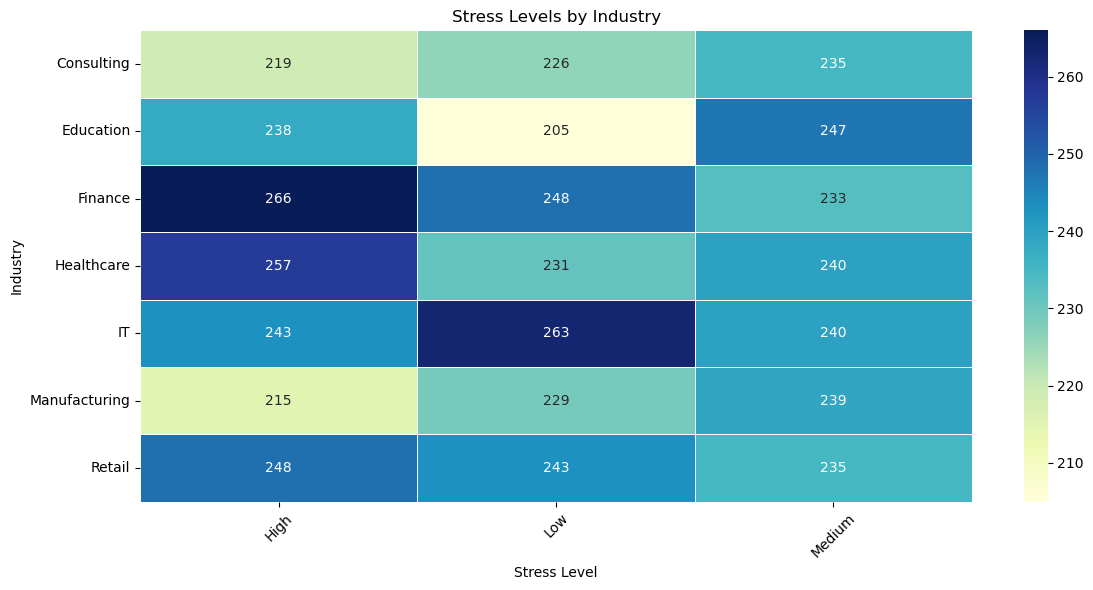

In [214]:
# Plot the data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(stress_by_industry, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

# Customizing the plot
plt.title('Stress Levels by Industry')
plt.xlabel('Stress Level')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# 20. Impact of Age on Job Satisfaction
Analyze how age affects satisfaction with remote work.

In [218]:
# Group by age groups and calculate the average satisfaction
age_satisfaction = df.groupby('Age Group')['Satisfaction_Numeric'].mean()

age_satisfaction

Age Group
18-30    1.995726
30-40    2.005650
40-50    1.984103
50-60    2.013386
Name: Satisfaction_Numeric, dtype: float64

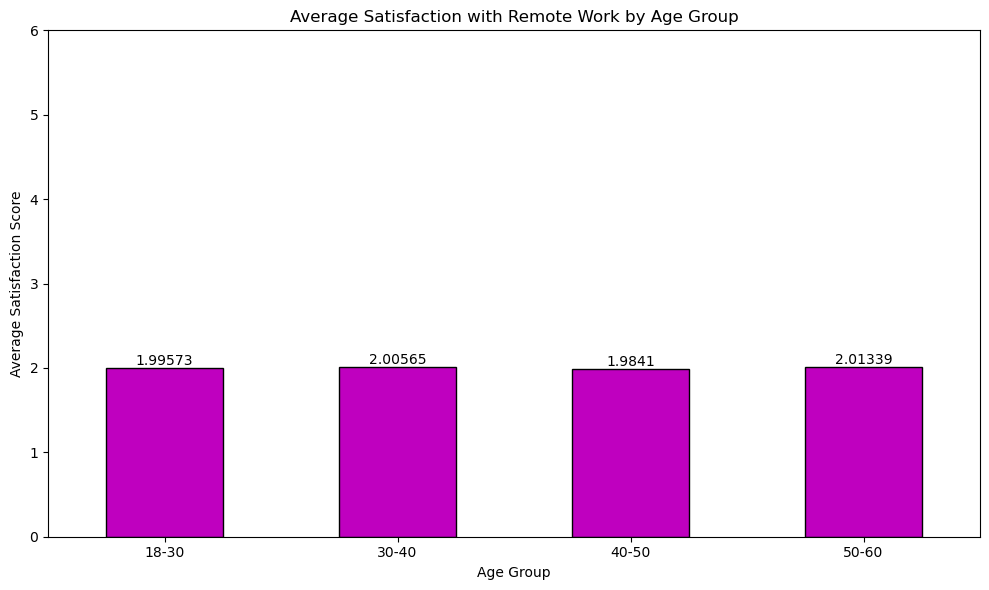

In [221]:
# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
ax=age_satisfaction.plot(kind='bar', color='m',edgecolor="black")

# Customizing the plot
plt.title('Average Satisfaction with Remote Work by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=0)
plt.ylim(0, 6)  # Assuming satisfaction scores are from 1 to 5
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)


# Show the plot
plt.show()